In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [122]:
job="product_manager"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [123]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Optum,Program Manager - AIML,Bengaluru,600000.0,"Project management, Quality assurance, Natural...",3.5,Product Manager
1,Seedify,AI Product Manager,Remote,0.0,"TensorFlow, Image processing, Computer vision,...",3.1,Product Manager
2,Wadhwani AI,Program Manager - Health,Delhi,0.0,"Microsoft Powerpoint, Microsoft Word, Microsof...",3.2,Product Manager
3,ARMMAN,Product Manager - Mumbai / Hyderabad,Mumbai,700000.0,"Analysis skills, Machine learning, Product man...",4.8,Product Manager
4,Wadhwani AI,Senior Program Manager / Deputy Chief of Party...,Kālkāji Devi,650000.0,"Microsoft Powerpoint, Microsoft Word, Microsof...",3.2,Product Manager


In [124]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                   50
company_rating           95
standardized_job_role     0
dtype: int64

In [125]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [126]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,Seedify,AI Product Manager,Remote,0.0,"TensorFlow, Image processing, Computer vision,...",3.1,Product Manager
2,Wadhwani AI,Program Manager - Health,Delhi,0.0,"Microsoft Powerpoint, Microsoft Word, Microsof...",3.2,Product Manager
5,Polygon,Technical Product Manager,Remote,0.0,"Management, Git, Research, Project management,...",3.3,Product Manager
6,Coinbase,"Senior Product Manager, Accounting Books & Rec...",Remote,0.0,"Product management, Accounting, APIs",3.8,Product Manager
7,Coinbase,"Senior Product Manager, Platform",Remote,0.0,"Product development, Machine learning, Product...",3.8,Product Manager
...,...,...,...,...,...,...,...
484,Mco hospital aids pvt ltd,Product Manager,India,0.0,"Analysis skills, Computer networking, Communic...",NaN,Product Manager
488,BrowserStack,Principal Product Manager,Remote,0.0,"Web development, Test automation, Application ...",4.3,Product Manager
497,Egnyte,Sr Product Manager - AI/ML,Remote,0.0,"Sales support, Spark, Machine learning, Produc...",4.0,Product Manager
501,ArtPark - I-Hub for Robotics and Autonomous Sy...,Product Manager (Health Data Platform & Tools),Bengaluru,0.0,"Writing skills, Public speaking, Application d...",NaN,Product Manager


### Filling the null values by replacing with average salary of company rating

In [128]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [129]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [130]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Optum,Program Manager - AIML,Bengaluru,6.000000,"Project management, Quality assurance, Natural...",3.5,Product Manager
1,Seedify,AI Product Manager,Remote,6.250000,"TensorFlow, Image processing, Computer vision,...",3.1,Product Manager
2,Wadhwani AI,Program Manager - Health,Delhi,6.083333,"Microsoft Powerpoint, Microsoft Word, Microsof...",3.2,Product Manager
3,ARMMAN,Product Manager - Mumbai / Hyderabad,Mumbai,7.000000,"Analysis skills, Machine learning, Product man...",4.8,Product Manager
4,Wadhwani AI,Senior Program Manager / Deputy Chief of Party...,Kālkāji Devi,6.500000,"Microsoft Powerpoint, Microsoft Word, Microsof...",3.2,Product Manager
...,...,...,...,...,...,...,...
523,Autodesk,"Product Manager, Data Products & Insights (Cus...",Bengaluru,18.000000,"Enterprise Software, Product management, Risk ...",4.3,Product Manager
524,Link Group,"Product Owner, Workflow",Pune,7.000000,"Pegasystems, Digitization, Product development...",3.5,Product Manager
525,Elula Tech Pvt Ltd.,Product Manager,Bengaluru,7.000000,"Jira, WordPress, Writing skills, SQL, PHP",4.9,Product Manager
526,NCR Atleos,SW Product Owner III,Hyderābād,6.500000,"SAFe, Confluence, Debits & credits, Requiremen...",3.4,Product Manager


In [131]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [132]:
df.describe()

,salary_lpa,company_rating
count,528.000000,528.000000
mean,9.425601,3.174432
std,7.424478,1.557332
min,0.600000,0.000000
25%,6.000000,3.200000
50%,7.000000,3.800000
75%,9.595238,4.100000
max,65.000000,5.000000


In [133]:
df.nunique()

company_name             451
job_role                 237
job_location              47
salary_lpa                79
skills                   434
company_rating            29
standardized_job_role      1
dtype: int64

In [134]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [136]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [137]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
9      product management    261
8         analysis skills    133
37   communication skills    123
56                  agile     91
24    product development     91
..                    ...    ...
166          google suite      1
165                   rmf      1
164    financial analysis      1
6        image processing      1
253      content creation      1

[254 rows x 2 columns]


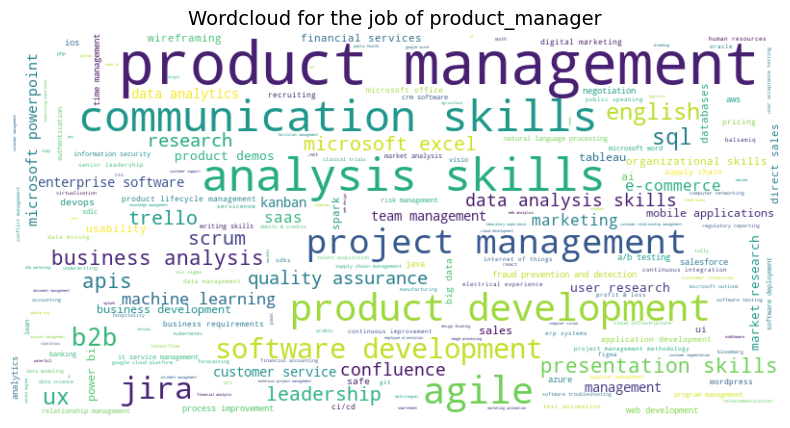

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


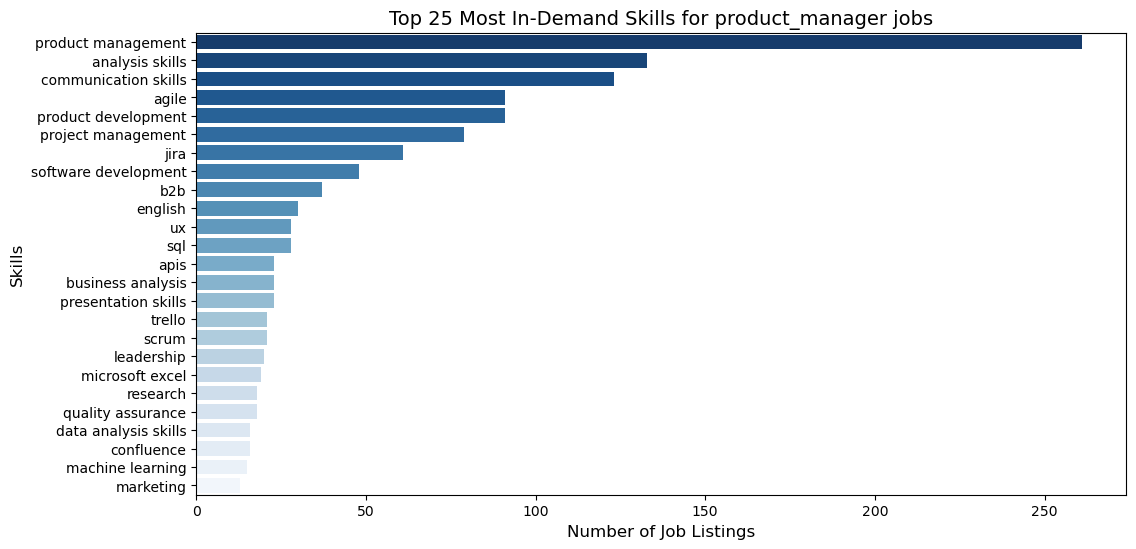

In [139]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [141]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                 company_name  salary_lpa
54                     BEIING        65.0
86          Cashfree Payments        48.0
150                  Flipkart        48.0
115                     Cvent        48.0
256             Newton School        42.0
147  FactSet Research Systems        42.0
159                  Gamemano        37.5
122                  Deloitte        36.0
370             SurveySparrow        36.0
284                      PayU        33.0


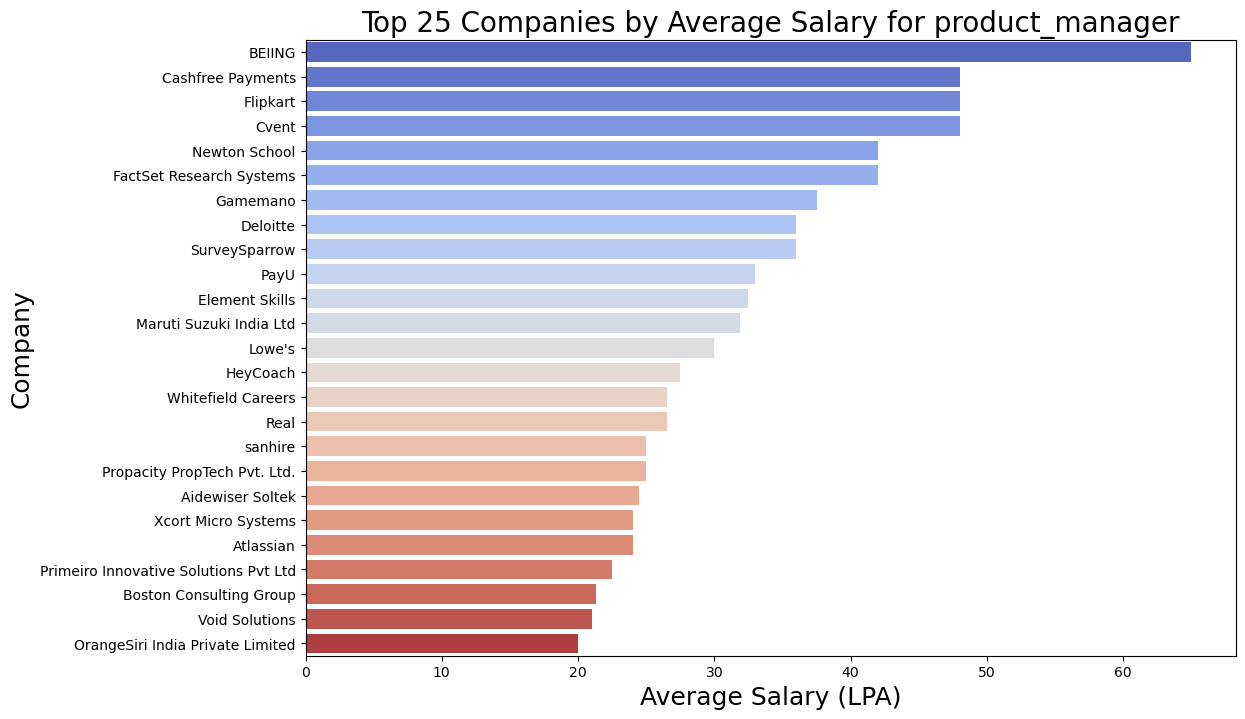

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

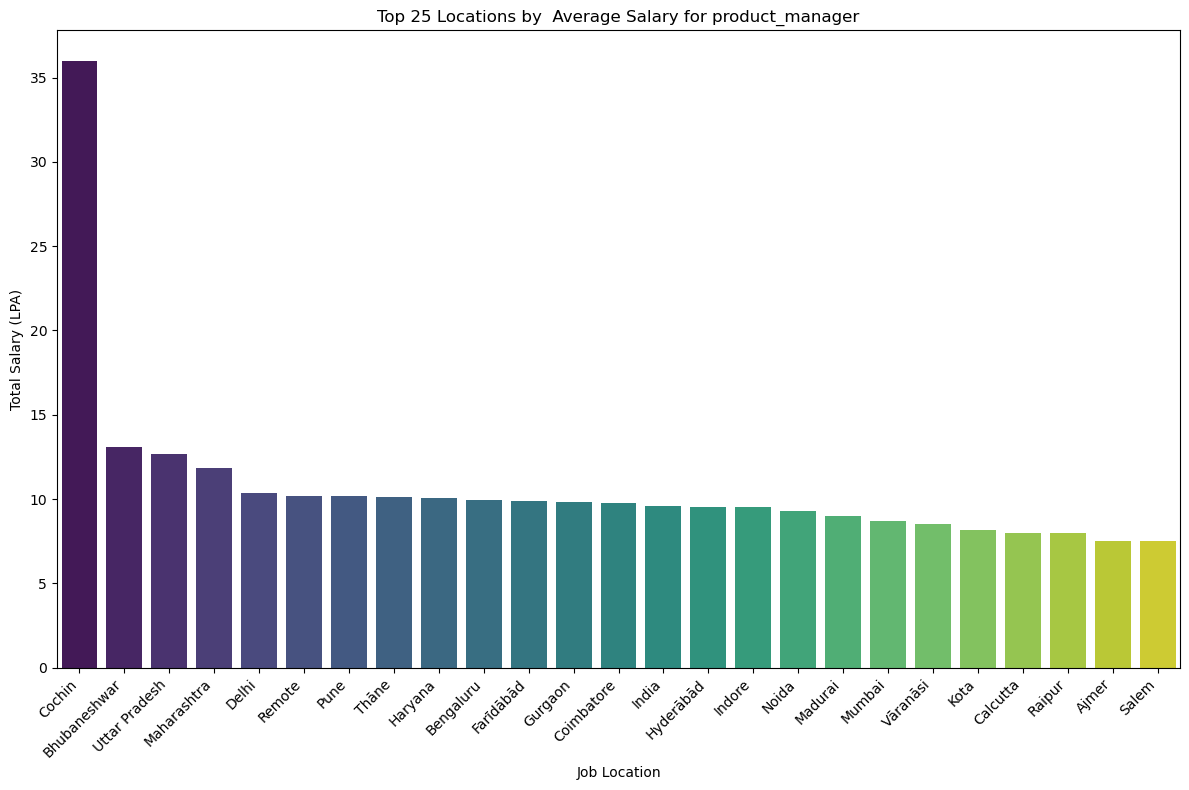

In [144]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

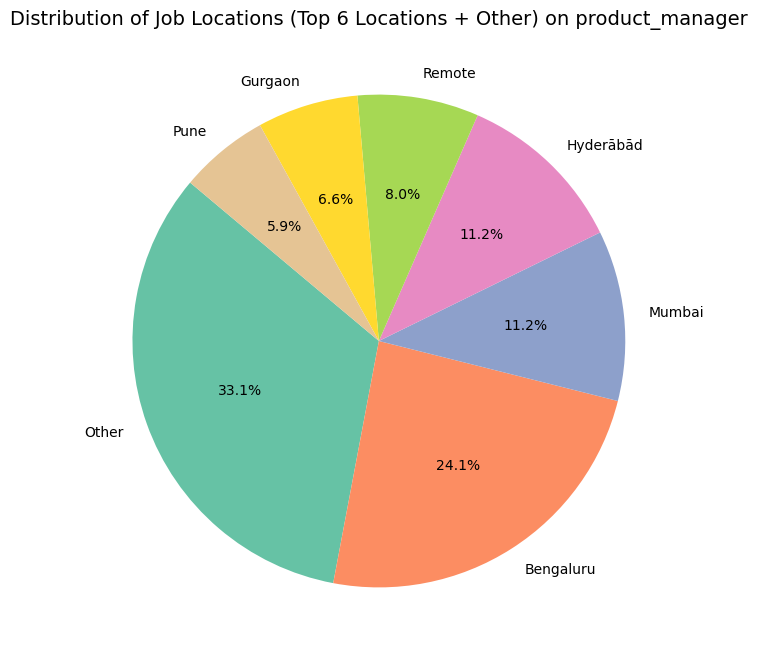

In [145]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

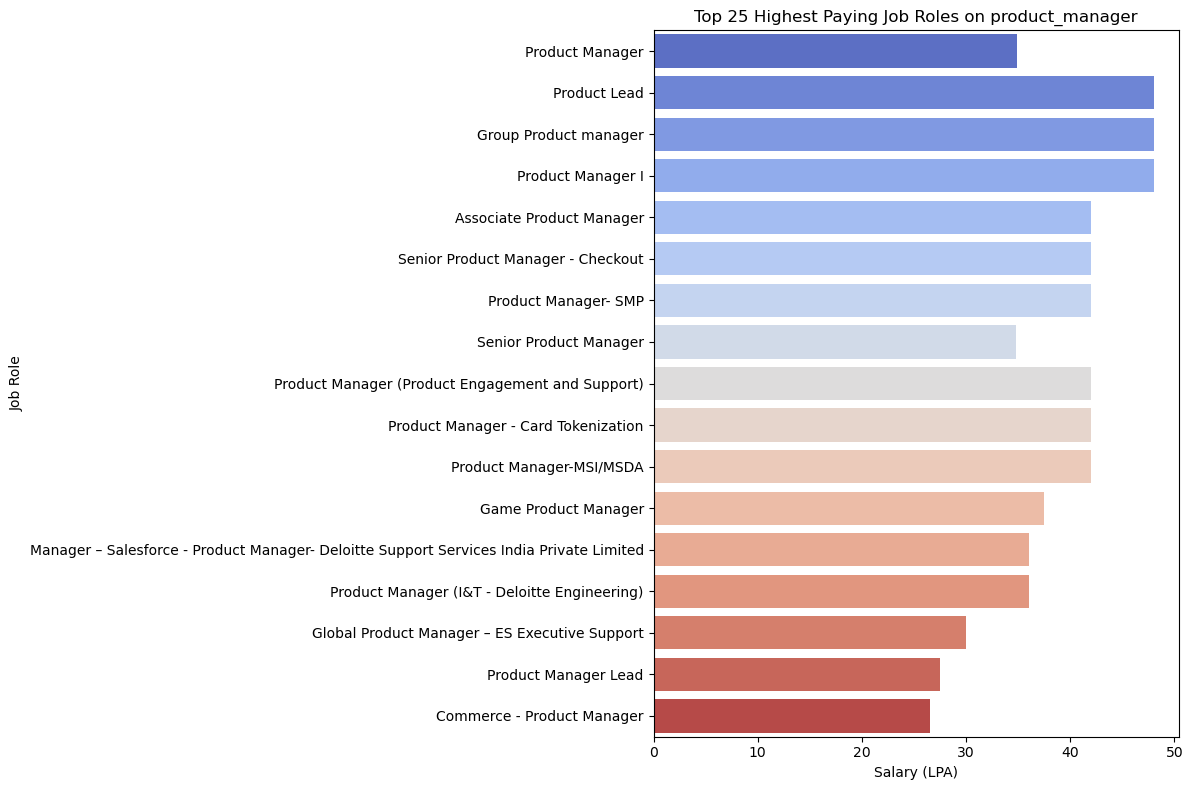

In [147]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [149]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_24680\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


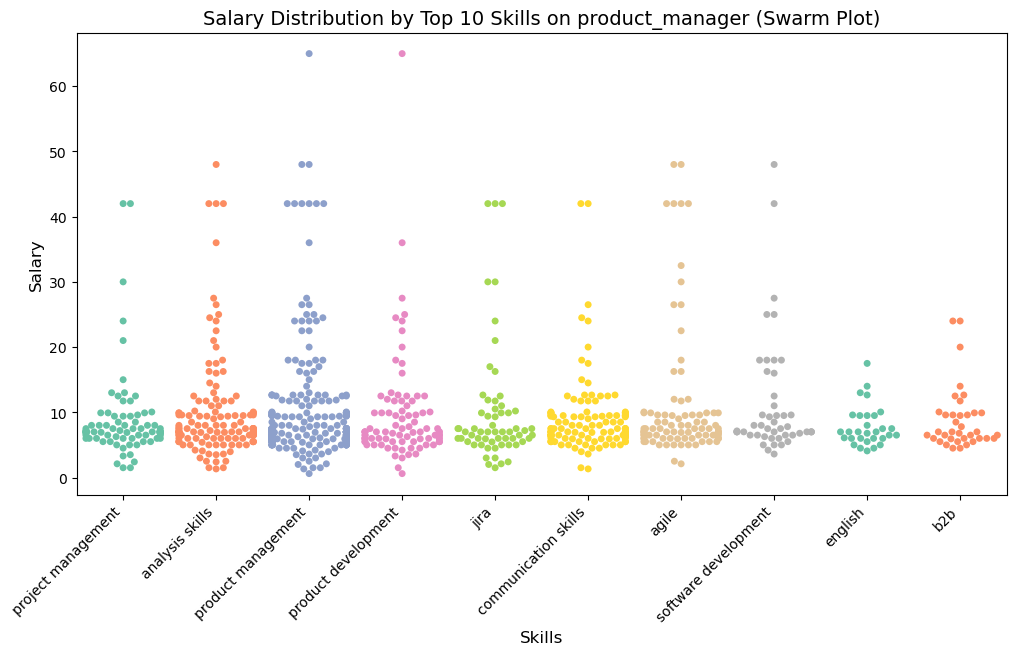

In [150]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

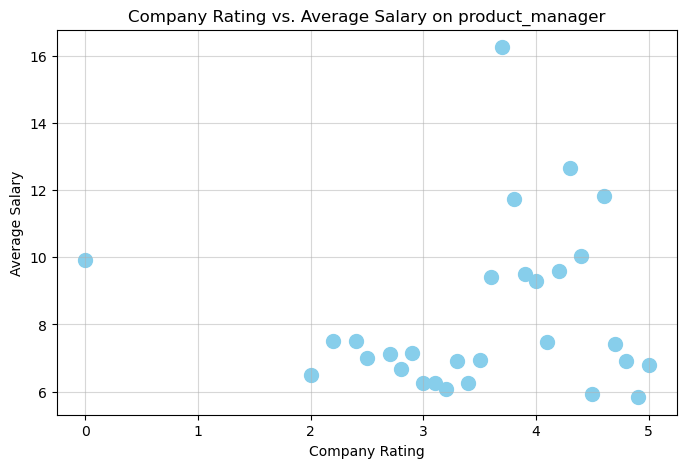

In [152]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [153]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.052640446516054686